# Predicting Penguin Species in the Palmer Archipelago


## 1. Introduction
### Background Information: 
The Palmer Archipelago, which is situated off the western coast of the Antarctic Peninsula is located around the Southern pole of the Earth and routinely reaches temperatures lower than -40℃. While this is far too cold for humans to live comfortably, numerous animals call this continent, and the water around it, home. For this project, we will focus on the Adelie, Chinstrap, and Gentoo penguins that live on this landmass. It is important to conduct research on these penguins since climate warming and associated sea ice reductions in Antarctica have modified habitat conditions for some species. These include the congeneric Adelie, Chinstrap, and Gentoo penguins, which now demonstrate remarkable population responses to regional warming. (Forcada & Trathan & Reid & Murphy & Croxall, 2006). Therefore, the more information we have on these fascinating creatures, the greater the chances we have to help them and prevent their extinction.

### Research Question: 
Can we predict the species of penguin based on their culmen length (mm), culmen depth (mm), flipper length (mm), and body mass (g)? These predictors were chosen for our research question based on their relevance to understanding the distinctive features of penguins in the Antarctic region.  By focusing on these specific parameters, we aim to create a predictive model that enhances our understanding of the unique appearance of different penguin species.

### Description of the Dataset:
This dataset, carefully collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network, provides valuable insights into the ecological and morphological characteristics of penguin populations (Gorman 2014). It was collected in the Palmer Archipelago, which, besides being a popular tourist attraction, is also a common sight for researchers studying penguins as it is the location of multiple species’ breeding grounds. The dataset has information on three species of penguin (chinstrap penguins, adélie penguins, and gentoo penguins), and contains data collected from individual penguins including their species, region, egg dates, sex, various statistics relating to the culmens (the top section of a birds beak), flippers and body mass.

| Varible | Unit | Description |
| --- | --- | --- |
| culmen_length | Millimeters (mm) | The length of the upper ridge of its beak.|
| culmen_depth | Millimeters (mm) | The depth of the upper ridge of its beak.  |
| flipper_length | Millimeters (mm) | The length of the its flippers.  |
| body_mass | Grams (g) | The weight of the penguin's body.  |
| species | | The class that we will be trying to predict. |

Figure 1.1: Key variables in dataset



### Expected outcomes and significance: 
We expect to find that some penguin species typically have certain traits. For example, maybe one of the penguin species typically has the shortest culmen length. These findings could lend insight into the penguins evolution process. If we look at specific traits that have been developed over millions of years, we could perhaps get a better picture of what the world was like when they were evolving through the specific traits they developed. This could lead to future questions involving why certain penguin species developed differently than other penguin species and, in a similar vein, questions about where they will go from here.Figure 1.1: Key variables in the data set

## 2. Methods

The dataset we are working on will need to be downloaded from a URL. We will need to "tidy" the data as it is not suited for work in it's current state. Only physical measurements will be considered from our dataset.  We will then split the dataset into 70%  training and 30% testing. This split is integral as we need to assess our model on unseen data. 

The first step in our project is the Data Splitting. We will divide the penguin dataset into two subsets which are a training set and a testing set. We are planning to use a split ratio of 70:30. The second step is the variable selection, we will select the relevant features, culmen length, culmen depth, flipper length, and body mass for prediction. The third step is the KNN Model Building. We will specify a KNN model for classification and train the KNN model using our training set. Then we will use cross-validation to find the optimal value of k. The fourth step is the Model Evaluation. We will use the testing data to evaluate the KNN model’s performance. The following classification performance metrics will be calculated to measure the performance of our model, Accuracy (to measure the overall model accuracy in predicting penguin species), Confusion Matrix (to assess the number of true positives and negatives, as well as false positives and negatives), Precision and Recall. The final step is the Visualization. We will visualize our result using multivariate histogram charts. We will plot the different variables individually on histogram charts and color the bars to represent the count from each penguin species. Then, we will line the charts up in a grid so they are easier to read.

### Preliminary Data Processing
The preliminary data processing includes:
1. Downloading the dataset from the web.
2. Wrangling the raw data into a tidy format.
3. Splitting the data 
4. Visualization of Training Data

### 0. Environment setup

In [1]:
#install these libraries 
install.packages("kknn")
install.packages('GGally')
library(tidyverse) 
library(dplyr)
library(tidymodels)
library(kknn)
options(repr.matrix.max.rows = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::di

### 1. Downloading the dataset from the web.

In [2]:
#download and read data
download.file("https://raw.githubusercontent.com/matthewsans/DCSI-100-group-project/main/penguins_lter.csv", "penguins")
penguin_data <- read_csv("penguins")
penguin_data


Rows: 344 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): studyName, Species, Region, Island, Stage, Individual ID, Clutch C...
dbl  (7): Sample Number, Culmen Length (mm), Culmen Depth (mm), Flipper Leng...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181,3750,MALE,NA,NA,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186,3800,FEMALE,8.94956,-24.69454,NA
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195,3250,FEMALE,8.36821,-25.33302,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222,5750,MALE,8.30166,-26.04117,NA
PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212,5200,FEMALE,8.24246,-26.11969,NA
PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213,5400,MALE,8.36390,-26.15531,NA


### 2. Tidying the raw data.

The raw data has a number irrelevant columns, and we will only include columns that have recorded physical measurements which include the following; Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), and Body Mass (g). Finally will include the Species column, and change its data type to be a factor as its the class we are trying to predict. We will also refactor the Species observations to shortened names to make them easier to work with. The columns also need to be standardized so we will remove spaces and only use lower-case characters. 

In [3]:
#Wrangle and clean data
names(penguin_data)[13] <- "body_mass"
names(penguin_data)[2] <- "sample_number"
names(penguin_data)[3] <- "species"
names(penguin_data)[10] <- "culmen_length"
names(penguin_data)[11] <- "culmen_depth"
names(penguin_data)[12] <- "flipper_length"
names(penguin_data)[13] <- "body_mass"
names(penguin_data)[5] <- "island"

penguin_data <- penguin_data |>
  mutate(species = fct_recode(species,
                              "Adelie" = "Adelie Penguin (Pygoscelis adeliae)",
                              "Chinstrap" = "Chinstrap penguin (Pygoscelis antarctica)",
                              "Gentoo" = "Gentoo penguin (Pygoscelis papua)"))
na_penguin <- select(penguin_data, c(species, culmen_length, culmen_depth, flipper_length, body_mass)) |> 
    mutate(species = as.factor(species))
clean_penguin <- select(penguin_data, c(species, culmen_length, culmen_depth, flipper_length, body_mass)) |> 
    mutate(species = as.factor(species)) |>
    drop_na()
clean_penguin

species,culmen_length,culmen_depth,flipper_length,body_mass
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie,39.1,18.7,181,3750
Adelie,39.5,17.4,186,3800
Adelie,40.3,18.0,195,3250
⋮,⋮,⋮,⋮,⋮
Gentoo,50.4,15.7,222,5750
Gentoo,45.2,14.8,212,5200
Gentoo,49.9,16.1,213,5400


Figure 2.2: Tidy Penguin Data

### 3. Splitting the Data 

The dataset will be separated into a split of 30% testing data and 70% training data. Setting a seed will ensure the random process of selected data can be repeated and produce the same results.

In [4]:
#Split data for exploring and training
set.seed(9876)
split_penguin <- initial_split(clean_penguin, prop = 0.70, strata = species)
penguin_training <- training(split_penguin)  # USE FOR DATA VISUALATION/TRAINING
penguin_testing <- testing(split_penguin)    # DO NOT USE UNTIL FINAL TEST


### 4.  Summary Statistics of Training Data
With the dataset cleaned and split we can now perform exploratory data analysis. The we first calculate the amount of NA's in the dataset, and we calculate the mean of each column for each species.


In [5]:
#exploratory data analysis


penguin_na <- na_penguin |>
    group_by(species) |>
    rowwise() |>
    mutate(na_count = sum(is.na(c_across(everything())))) |>
    group_by(species) |>
    summarise(na_count = sum(na_count)) |>
    select(na_count)
penguin_mean <- penguin_training |>
      group_by(species) |>
      summarize(across(culmen_length:body_mass, \(x) mean(x, na.rm = TRUE)))
colnames(penguin_mean)[2:5] <- c("mean_culmen_length", "mean_culmen_depth", "mean_flipper_length", "mean_body_mass")
penguin_table <- bind_cols(penguin_mean, penguin_na)
penguin_table



species,mean_culmen_length,mean_culmen_depth,mean_flipper_length,mean_body_mass,na_count
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Adelie,38.82571,18.39524,189.9333,3702.857,4
Chinstrap,48.95319,18.31702,194.8085,3724.468,0
Gentoo,47.89186,15.06744,217.5814,5091.279,4


Figure 2.3: Training Data Table Summary

### 4.  Visualization of Training Data
creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis
We will produce graphs to visualize the relationship of the variables that are used to predict the penguin species. 

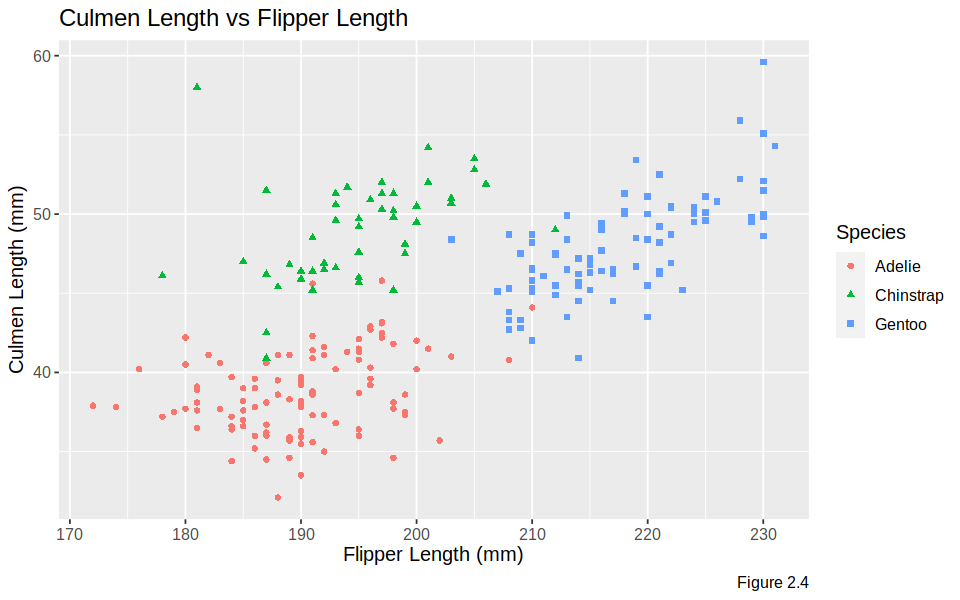

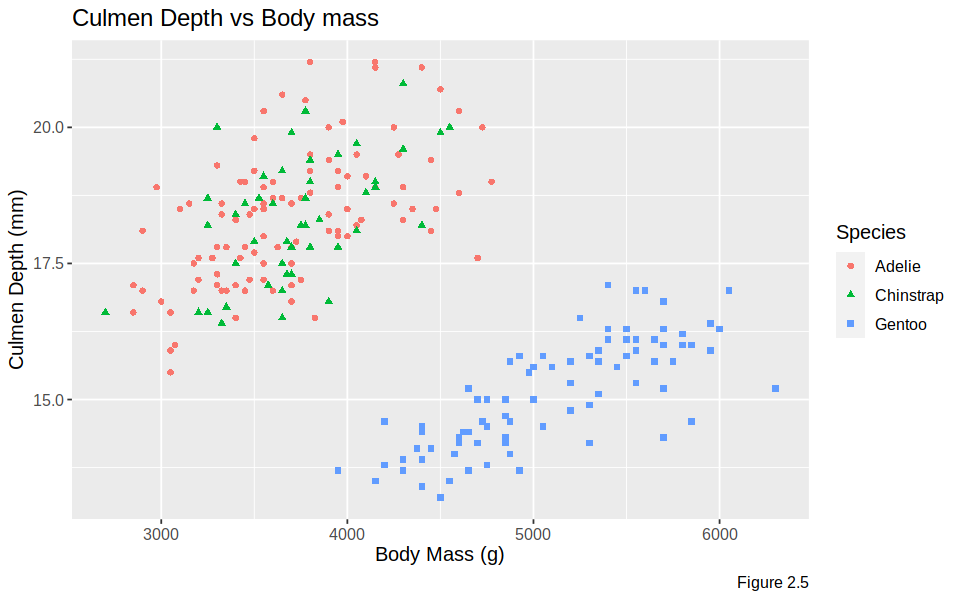

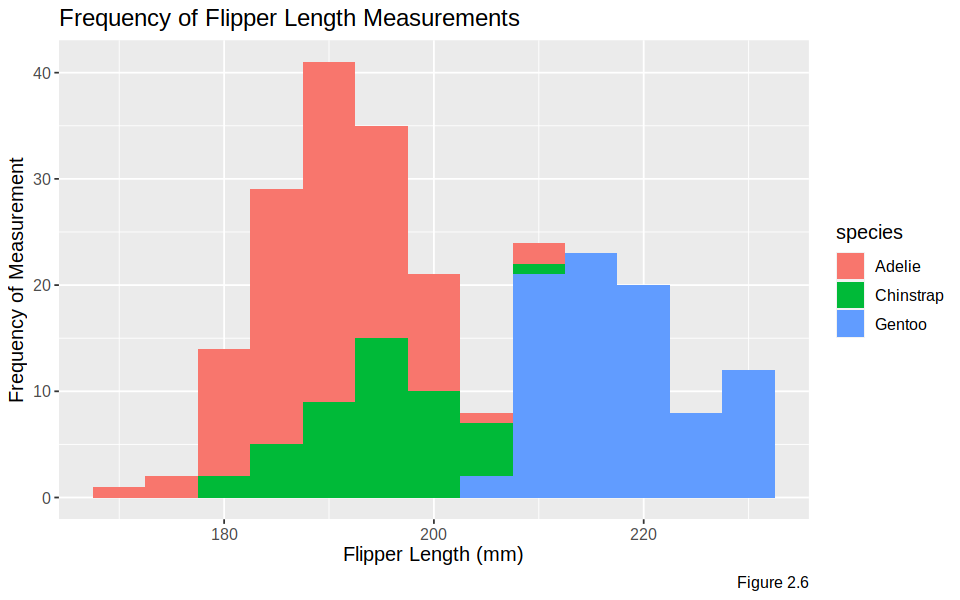

In [6]:
#Visualization

options(repr.plot.width = 8, repr.plot.height = 5)

penguin_visual1 <- ggplot(penguin_training, aes(y = culmen_length, x = flipper_length, color = species, shape = species)) +
    geom_point() + 
    labs(y = "Culmen Length (mm)", x = "Flipper Length (mm)", color = "Species", shape = "Species",
        caption = "Figure 2.4") +
    ggtitle("Culmen Length vs Flipper Length") +
    theme(text = element_text(size = 12)) 

penguin_visual2 <- ggplot(penguin_training, aes(y = culmen_depth, x = body_mass, color = species, shape = species)) +
    geom_point() + 
    labs(y = "Culmen Depth (mm)", x = "Body Mass (g)", color = "Species", shape = "Species",
        caption = "Figure 2.5") +
    ggtitle("Culmen Depth vs Body mass") +
    theme(text = element_text(size = 12)) 

penguin_visual3 <- ggplot(penguin_training, aes(x = flipper_length, fill = species)) +
    geom_histogram(binwidth = 5) +
    labs(y = "Frequency of Measurement", x = "Flipper Length (mm)",
        caption = "Figure 2.6", title = "Frequency of Flipper Length Measurements") +
    theme(text = element_text(size = 12)) 



penguin_visual1
penguin_visual2
penguin_visual3

We can see from figures 2.4 and 2.5, that scattor plots show some seperation between the species based on the body mass, flipper length, culmen depth, and culmen length. The histogram further supports that flipper length have a different frequency distribution for each species. We can confidently determine that body mass, flipper length, culmen depth, and culmen length are great variables to choose for our model.

### Data Analysis 
The data analysis includes:
1. Tuning the Classifier
2. Creating the K-nearest Neighbor Model
3. Evaluating performance

### 1. Tuning the Classifier

In order to perform k-nearest neighbors analysis, the model needs to be tuned with cross-validation. This means a good k-value needs to carefully picked by trying different k-values on the training dataset, and finding the best performing one

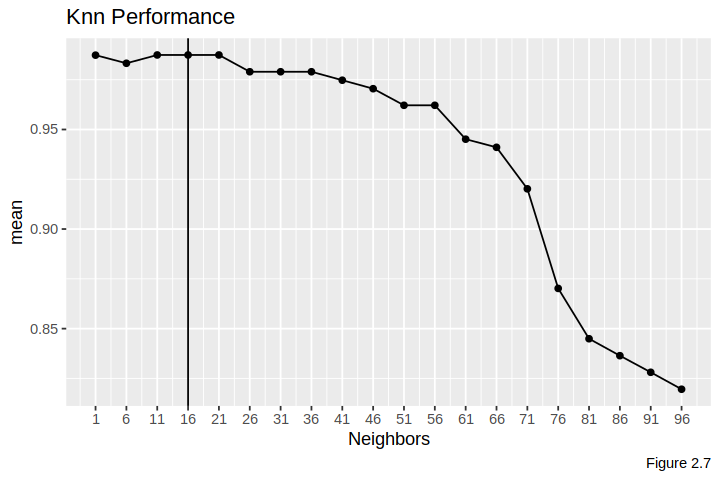

In [7]:
# we need to make a model
#kkn_spec <- knn(
set.seed(9876)


new_penguin_plot <- ggplot(penguin_training, aes(x = island, colour = species)) +
                           geom_bar()
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

penguin_vfold <- vfold_cv(penguin_training, v = 5, strata = species)

penguin_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

penguin_recipe <- recipe(species ~ ., data = penguin_training) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())
#Cross-validation
penguin_fit <- workflow() |>
    add_recipe(penguin_recipe) |>
    add_model(penguin_spec) |>
    tune_grid(resamples = penguin_vfold, grid = k_vals ) |>
    collect_metrics()

options(repr.plot.width = 6, repr.plot.height = 4)
nn_plot <- penguin_fit |>
    filter(.metric == "accuracy") |>
    ggplot(aes(x = neighbors, y = mean)) +
           geom_line() +
           geom_point() + 
           geom_vline(xintercept = 16) +
           scale_x_continuous(breaks = seq(1, 100, by = 5)) +
           labs(x = "Neighbors", y = "mean", caption = "Figure 2.7", title = "Knn Performance")

nn_plot
    


We can see from Figure 2.7 that there are multiple contenders for a k-value to pick. However, it looks like k = 16 would provide us with the most stable value as it doesn't vary between the points next to it. The first point has a high mean, but is most likely a product of overfitting. We can now confidently train our model with a k-value of 16.

### 2. Creating the K-nearest Neighbor Model

With our new k-value, we can create a model with the training data. The penguin testing dataset can now be used, and it will be key to assessing our model as it is data it has not seen yet. We can reuse the old recipe, but we will need new specifications for our model to update the neighbors. Figure 2.8 shows that there is a new column called .pred_class. This new column is our predicted species that our model has produced. 

In [8]:

best_spec <- penguin_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 16) |>
  set_engine("kknn") |>
  set_mode("classification")

penguin_model <- workflow() |>
    add_recipe(penguin_recipe) |>
    add_model(best_spec) |>
    fit(data = penguin_training) 

penguin_pred <- predict(penguin_model, penguin_testing) |>
    bind_cols(penguin_testing)

penguin_pred

.pred_class,species,culmen_length,culmen_depth,flipper_length,body_mass
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Adelie,Adelie,39.5,17.4,186,3800
Adelie,Adelie,40.3,18.0,195,3250
Adelie,Adelie,36.7,19.3,193,3450
⋮,⋮,⋮,⋮,⋮,⋮
Gentoo,Gentoo,50.5,15.2,216,5000
Gentoo,Gentoo,48.8,16.2,222,6000
Gentoo,Gentoo,45.2,14.8,212,5200


Figure 2.8

### 3. Evaluating performance

We can create a confusion matrix to determine help determine the performance of our model. It will show the species our model predicted correctly and incorrectly in an organized manner for assessment. 

In [9]:
confusion_matrix <- penguin_pred |>
             conf_mat(truth = species, estimate = .pred_class)

confusion_matrix

           Truth
Prediction  Adelie Chinstrap Gentoo
  Adelie        46         4      0
  Chinstrap      0        17      0
  Gentoo         0         0     37

Figure 2.9: Confusion Matrix

Now that the confusion matrix is in hand, we can get an idea of how well our model has done by using the following accuracy formula, 
\begin{align*} \text{accuracy} &= \frac{\text{number of correct predictions}}{\text{total number of predictions}}\\
                         &= \frac{100}{104} \\
                         &\approx 0.96 
\end{align*}

With the max accuracy being 1.0, our accuracy of 0.96 indicates that our model is highly effective at predicting penguin species. The calculation of recall and precision become helpful when looking further into each species prediction. 

In [10]:


Accuracy = c(0.92, 1.0, 1.0)
recall = c(1.0, 0.81, 1.0)

penguin_proportions <- penguin_testing |>
                      group_by(species) |>
                      summarize(n = n()) |>
                      mutate(precision = Accuracy, recall = recall ) |>
                      select(species, precision, recall)

penguin_proportions 

species,precision,recall
<fct>,<dbl>,<dbl>
Adelie,0.92,1.00
Chinstrap,1.00,0.81
Gentoo,1.00,1.00


Figure  2.10: Precision and Recall table

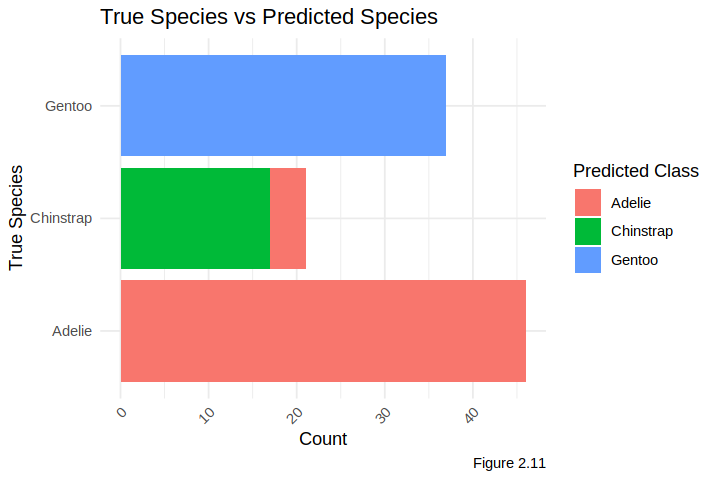

In [11]:

visual_final <- ggplot(penguin_pred, aes(x = species, fill = .pred_class)) +
    geom_bar() +
    labs(title = "True Species vs Predicted Species",
       x = "True Species",
       y = "Count",
       fill = "Predicted Class",
       caption = "Figure 2.11") +
    theme_minimal() +
    coord_flip() +
    scale_x_discrete(labels = c("Adelie", "Chinstrap", "Gentoo")) +
    theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1))
visual_final

Precision measures the proportion of positive identifications made by the classifier that were indeed correct. Recall quantifies how many actual positive cases in the test set were correctly classified as positive by the model. Looking at the Figure 2.10 and the species distribution in Figure 2.11, it looks like the model had difficulty differentiating between the Adelie and Chinstrap species. Meanwhile the Gentoo species was predicting with flawless accuracy. 

## 3. Discussion

Our data science project, aimed at predicting penguin species, Chinstrap, Adélie, and Gentoo, in the Palmer Archipelago based on culmen length, culmen depth, flipper length, and body mass, has yielded significant findings through visualization and model evaluation.
 
In our visualization analysis, focusing on culmen length and flipper length, we observed distinct clusters for these 3 species. This implies that these two features serve as reliable predictors for distinguishing between the species, offering a clear visual separation on the graph. However, the visualization of culmen depth and body mass presented a different situation. While Gentoo remains distinctly separate, Adélie and Chinstrap show less pronounced differences in these two features. This suggests that for Adélie and Chinstrap, culmen depth and body mass might not be as effective in isolation for species differentiation.

The confusion matrix, a crucial element of model evaluation, revealed an impressive accuracy rate of approximately 96% in our classification model. This proves the model's proficiency in correctly classifying the three penguin species based on our chosen features. The precision metrics further enhance our understanding of the model's performance. For Adélie, the precision is calculated at 0.92. Chinstrap achieves a precision score of 1.0, denoting perfect precision, while Gentoo also achieves a perfect score of 1.0. The recall metrics, complementing precision, provide insight into the model's ability to correctly predict all instances of a particular species. In our model, Adélie, Chinstrap, and Gentoo all boast a recall score of 1.0, showing that the model effectively identifies and recalls all instances of these species.
 
The overall model performance, as evidenced by the accuracy, precision, and recall metrics, demonstrates the efficacy of our predictive model in classifying penguin species. The clear separation observed in the visualization aligns with the high precision and recall scores, affirming the model's ability to correctly classify penguin species based on the selected features.


### Expected Findings
Our expectations going into the project were aligned with the assumption that certain morphological features, such as culmen length, flipper length, culmen depth, and body mass, would play crucial roles in distinguishing between different penguin species. The anticipation was that the visualization would reveal clear clusters for each species based on these features. The result matches the expectation, we create a predictive model with high accuracy, precision, and recall by using the above features, and the visualization further demonstrates the features' contribution in distinguishing these species.


### Expected outcomes and significance:
Our expectations going into the project were aligned with the assumption that certain morphological features, such as culmen length, flipper length, culmen depth, and body mass, would play crucial roles in distinguishing between different penguin species. The anticipation was that the visualization would reveal clear clusters for each species based on these features. The result matches the expectation, we create a predictive model with high accuracy, precision, and recall by using the above features, and the visualization further demonstrates the features' contribution in distinguishing these species.

### Impact of Findings
The protection among penguins is important since penguin populations potentially reflect both natural variability and directional change in oceanographic production within several hundred kilometers of their colonies, including changes induced by human activities (Trathan & García‐Borboroglu & Boersma &  Bost & Crawford & Crossin & Cuthbert &  Dann & Davis & De La Puente & Ellenberg &  Lynch & Mattern & Pütz & Seddon &, Trivelpiece  & Wienecke, B, 2015). Accurate species identification is paramount for implementing targeted conservation strategies. The model's ability to distinguish between species based on specific features can streamline conservation initiatives, ensuring they are tailored to the unique characteristics of each species. This, in turn, enhances the efficacy of conservation interventions and contributes to the overall well-being of penguin populations.

### Future Questions
Future research could explore the inclusion of additional features or expand the dataset to encompass a broader range of morphological and ecological characteristics. This expansion may uncover supplementary features that contribute to species differentiation. Moreover, testing the model's performance across different regions could provide insights into regional variations in penguin morphology.
 
To further enhance species understanding, future investigations could delve into the behavioral and genetic factors influencing penguin morphology. Exploring how behaviors and genetic variations contribute to observed morphological differences may offer a more comprehensive picture of species dynamics.


## References: 
Trathan, P. N., García‐Borboroglu, P., Boersma, D., Bost, C., Crawford, R. J. M., Crossin, G. T., Cuthbert, R. J., Dann, P., Davis, L. S., De La Puente, S., Ellenberg, U., Lynch, H. J., Mattern, T., Pütz, K., Seddon, P. J., Trivelpiece, W., & Wienecke, B. (2015). Pollution, habitat loss, fishing, and climate change as critical threats to penguins. Conservation Biology, 29(1), 31-41.
https://doi.org/10.1111/cobi.12349

Forcada, J., Trathan, P.N., Reid, K., Murphy, E.J., Croxall, J.P. (2006).2.Contrasting population 
changes in sympatric penguin species in association with climate warming. Global Change Biology (2006) 12, 411–423.
doi: 10.1111/j.1365-2486.2006.01108.x

Gorman, K. B., Williams, T. D., & Fraser, W. R. (2014). Ecological sexual dimorphism and  
environmental variability within a community of antarctic penguins (Genus Pygoscelis). PloS One, 9(3), e90081–e90081. 
https://doi.org/10.1371/journal.pone.0090081
